### Task 5  - Train and test your policies

In this notebook, we use the trained model to test the performance of the policy.

In [1]:
import argparse

import gym

from stable_baselines3 import SAC
from env.custom_hopper import *
from gym import Wrapper
from mujoco_py import GlfwContext
import glfw
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
n_episodes = 50
seed_value = 1234

In [3]:
source_env = gym.make('CustomHopper-source-v0')
target_env = gym.make('CustomHopper-target-v0')


In [5]:
source_model = SAC.load("SAC-hyper-eval_callback/SAC_steps_100000_lr_0.001_gamma_0.995_tau_0.01_ent_coef_auto/best_model.zip")

target_model = SAC.load("SAC-hyper-eval_callback/SAC_steps_100000_lr_0.0003_gamma_0.99_tau_0.005_ent_coef_auto_target/best_model.zip")

In [6]:
def get_reward(env, model, n_episodes, seed, verbose = True):
    reward_list = np.array([])

    for i in range(n_episodes):
        done = False
        env.seed(seed + i)
        state = env.reset()
        total_reward = 0
        step_count = 0

        while not done:
            action, _ = model.predict(state, deterministic=True)

            state, reward, done, _ = env.step(action)
            total_reward += reward
            step_count += 1

        if verbose:
            print(f"Episode {i} reward: {total_reward} in total {step_count} steps")

        reward_list = np.append(reward_list, total_reward)

    return (reward_list)

In [7]:
rewards_list_source_source = get_reward(source_env, source_model, n_episodes, seed_value)

Episode 0 reward: 1535.9920321337434 in total 500 steps
Episode 1 reward: 1545.9931145481937 in total 500 steps
Episode 2 reward: 1531.331741206542 in total 500 steps
Episode 3 reward: 1535.693032598516 in total 500 steps
Episode 4 reward: 1543.0568469278812 in total 500 steps
Episode 5 reward: 1526.8612030872082 in total 500 steps
Episode 6 reward: 1531.3647140867747 in total 500 steps
Episode 7 reward: 1548.5479367744645 in total 500 steps
Episode 8 reward: 1547.4519264917842 in total 500 steps
Episode 9 reward: 1493.6930033778967 in total 500 steps
Episode 10 reward: 1547.791512353097 in total 500 steps
Episode 11 reward: 1534.4616135903575 in total 500 steps
Episode 12 reward: 1533.3983490785304 in total 500 steps
Episode 13 reward: 1545.6267323863335 in total 500 steps
Episode 14 reward: 1540.7382294046029 in total 500 steps
Episode 15 reward: 1545.6013995150586 in total 500 steps
Episode 16 reward: 1533.1547403855748 in total 500 steps
Episode 17 reward: 1529.0654973267663 in tot

In [8]:
rewards_list_source_target = get_reward(source_env, target_model, n_episodes, seed_value)

Episode 0 reward: 1122.751879921617 in total 366 steps
Episode 1 reward: 1410.1166609978084 in total 500 steps
Episode 2 reward: 1404.039040870683 in total 500 steps
Episode 3 reward: 1278.392306755622 in total 410 steps
Episode 4 reward: 1414.1833220040362 in total 500 steps
Episode 5 reward: 1395.9786284204945 in total 500 steps
Episode 6 reward: 1387.5912616135242 in total 500 steps
Episode 7 reward: 1417.7208796819793 in total 500 steps
Episode 8 reward: 1221.3342308310469 in total 388 steps
Episode 9 reward: 1430.7339458558229 in total 500 steps
Episode 10 reward: 1179.5605881946408 in total 379 steps
Episode 11 reward: 1414.1543906986017 in total 500 steps
Episode 12 reward: 1398.7238137483864 in total 500 steps
Episode 13 reward: 1387.681277520109 in total 500 steps
Episode 14 reward: 1393.2737727635629 in total 500 steps
Episode 15 reward: 1158.6444081034774 in total 374 steps
Episode 16 reward: 1393.5356075998832 in total 500 steps
Episode 17 reward: 1429.6133246046816 in tota

In [10]:
rewards_list_target_target = get_reward(target_env, target_model, n_episodes, seed_value)

Episode 0 reward: 1610.5399026787748 in total 500 steps
Episode 1 reward: 1543.355959650855 in total 500 steps
Episode 2 reward: 1500.3297771981283 in total 500 steps
Episode 3 reward: 1587.6367124275694 in total 500 steps
Episode 4 reward: 1561.1068944172466 in total 500 steps
Episode 5 reward: 1516.182103998069 in total 500 steps
Episode 6 reward: 1583.339949404261 in total 500 steps
Episode 7 reward: 1504.9927594494945 in total 500 steps
Episode 8 reward: 1635.41457912028 in total 482 steps
Episode 9 reward: 1530.3060499681994 in total 500 steps
Episode 10 reward: 1574.7617136434267 in total 500 steps
Episode 11 reward: 1524.0105733006003 in total 500 steps
Episode 12 reward: 1565.583769696052 in total 500 steps
Episode 13 reward: 1496.3742305816334 in total 500 steps
Episode 14 reward: 1531.5134033246875 in total 500 steps
Episode 15 reward: 1582.401801714155 in total 500 steps
Episode 16 reward: 1614.1109682432582 in total 500 steps
Episode 17 reward: 1557.4138094461473 in total 5

In [11]:
print(f"source-source: {rewards_list_source_source.mean()} +- {rewards_list_source_source.std()}")
print(f"source-target: {rewards_list_source_target.mean()} +- {rewards_list_source_target.std()}")
print(f"target-target: {rewards_list_target_target.mean()} +- {rewards_list_target_target.std()}")

source-source: 1536.067891006266 +- 11.059064702185337
source-target: 1334.0025821698212 +- 114.1046904827748
target-target: 1572.525960476471 +- 43.40665982784896


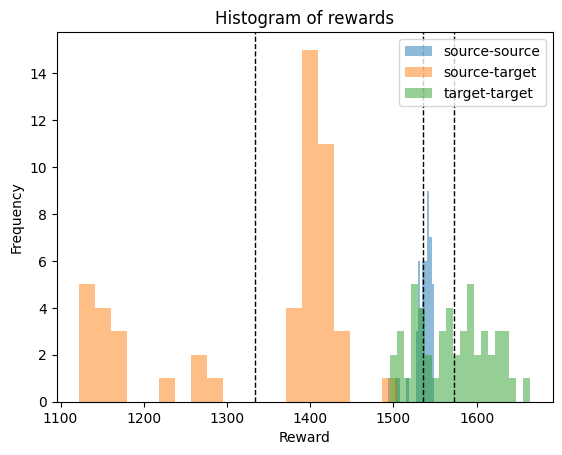

In [12]:
# plot histograms
plt.hist(rewards_list_source_source, bins=20, alpha=0.5, label='source-source')
plt.hist(rewards_list_source_target, bins=20, alpha=0.5, label='source-target')
plt.hist(rewards_list_target_target, bins=20, alpha=0.5, label='target-target')

# plot a vertical line for the mean
plt.axvline(rewards_list_source_source.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rewards_list_source_target.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(rewards_list_target_target.mean(), color='k', linestyle='dashed', linewidth=1)

plt.legend(loc='upper right')
plt.title('Histogram of rewards')
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.show()
plt.savefig("bounds.png")